In [1]:
# Setting: I was given a data set that I'd never seen before. Our research question is "what is the best method to easily predict the type of iris from the sepal/petal length and width data?" 

In [2]:
import itertools 

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

from sklearn.datasets import load_iris

## Initial data exploration 

This notebook provides an introduction to the iris data set as well as some initial exploratory visualizations.

In [3]:
# import data 

iris = load_iris(as_frame=True) #loading as a data frame instead of array lets us access features from the data more reliably (get the feature you want by name rather than hoping you indexed the correct column)

data_id = 'iris_full'

In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
iris.data.shape # This data has 150 samples and 4 features 

(150, 4)

In [6]:
print(iris.data[:20])  # the 4 features measured by this data set are :  

    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                 5.1               3.5                1.4               0.2
1                 4.9               3.0                1.4               0.2
2                 4.7               3.2                1.3               0.2
3                 4.6               3.1                1.5               0.2
4                 5.0               3.6                1.4               0.2
5                 5.4               3.9                1.7               0.4
6                 4.6               3.4                1.4               0.3
7                 5.0               3.4                1.5               0.2
8                 4.4               2.9                1.4               0.2
9                 4.9               3.1                1.5               0.1
10                5.4               3.7                1.5               0.2
11                4.8               3.4                1.6               0.2

In [7]:
# there are three subtypes of iris in the data set
print(iris.target_names)

# they are coded as 0, 1, 2
print(np.unique(iris.target)) 

['setosa' 'versicolor' 'virginica']
[0 1 2]


In [8]:
# no NaNs or 0s in this data set 
print(np.any(np.isnan(iris.data))) #nans? 
print(np.any(np.equal(iris.data, 0))) #0s? 

False
False


### What is the distribution of values for each attribute? 

In [9]:
# what do the values look like for each attribute? 


def histogram_for_each_feature(df, dataset_name="Iris"):
    '''
    creates one histogram for each feature in df, showing the distribution of values for that 
    feature

    Parameters: 
        df (pandas data frame): the data to analyze
        dataset_name (str): name to be displayed in graph title
    '''
    n_features=len(df.columns)

    # making subplots objects
    fig, axes = plt.subplots(nrows=1, ncols=n_features, squeeze=False, figsize=(14, 5))

    fig.suptitle('Histograms of values for each {} Variable'.format(dataset_name))  
    for ax, (columnName, columnData) in zip(axes.flat, df.iteritems()):
        ax.hist(columnData.values)
        ax.title.set_text(columnName)
    

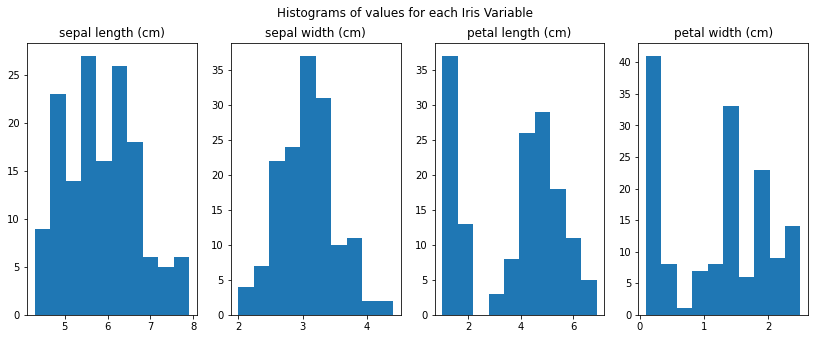

In [10]:
histogram_for_each_feature(iris.data)

# save plot  
plt.savefig('histogram_of_features.png') 

### What is the relationship between each of the features in the dataset?

In [11]:
# scatter plot colored by subtypes 

def pairwise_scatter_plot(df, subtypes=None):
    '''    
    
    Parameters: 
        df (pandas data frame): the data to analyze
        subtypes (array) : array aligned to df that contains labels to color each point 
    '''
    n_features=len(df.columns)

    fig, axes = plt.subplots(nrows=n_features, ncols=n_features, figsize=(8,8))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)

    for ax in axes.flat:
        # Hide all ticks and labels
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)

        # Set up ticks only on one side for the "edge" subplots...
        if ax.is_first_col():
            ax.yaxis.set_ticks_position('left')
        if ax.is_last_col():
            ax.yaxis.set_ticks_position('right')
        if ax.is_first_row():
            ax.xaxis.set_ticks_position('top')
        if ax.is_last_row():
            ax.xaxis.set_ticks_position('bottom')


    # Plot the data.
    for i, j in zip(*np.triu_indices_from(axes, k=1)): # i and j are column numbers  
        for x, y in [(i,j), (j,i)]: # this gets the upper and lower triangle of the scatter plot 
            col1 = df.iloc[:, x].values
            col2 = df.iloc[:, y].values
            axes[x,y].scatter(col1, col2, c=subtypes)


    # Label the diagonal subplots...
    for i, label in enumerate(df.columns.values):
        axes[i,i].annotate(label, (0.5, 0.5), xycoords='axes fraction',
                ha='center', va='center')


    # Turn on the proper x or y axes ticks.
    for i, j in zip(range(n_features), itertools.cycle((-1, 0))):
        axes[j,i].xaxis.set_visible(True)
        axes[i,j].yaxis.set_visible(True)

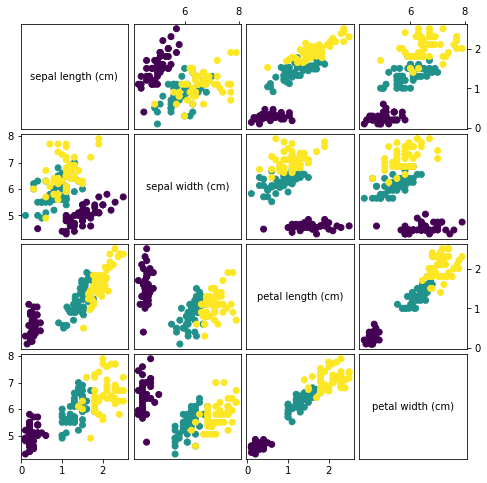

In [12]:
pairwise_scatter_plot(iris.data, iris.target)

plt.savefig('pairwise_scatter_plot_by_type.png')